<h1 style="color: blue;">CUSTOMER CHURN REPORT</h1>
<i>This report uses <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download">Kaggle's sample dataset</a> to analyze all relevant customer data and develop focused customer retention programs</i>

<h2>*1. DATA COLLECTION</h2>
<p>This part is skipped for this report, but it's important to keep in mind that the data should be truly random</p>

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import plotly.figure_factory as ff
import plotly.io as pio
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

sns.set(style = 'white')

# Input data files are available in the "./" directory.

import os
print(os.listdir("./"))

telecom_cust = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.head()
# Get the summary statistics
telecom_cust.describe(include='all')

['Telco Customer Churn Rate.ipynb', '.ipynb_checkpoints', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<h2>1. CLEAN DATA</h2>

In [7]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [2]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]

<h2>2. EXPLORE DATA</h2>

In [3]:

#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [7]:
df_dummies.describe(include='all')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_dummies.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contr

<AxesSubplot:>

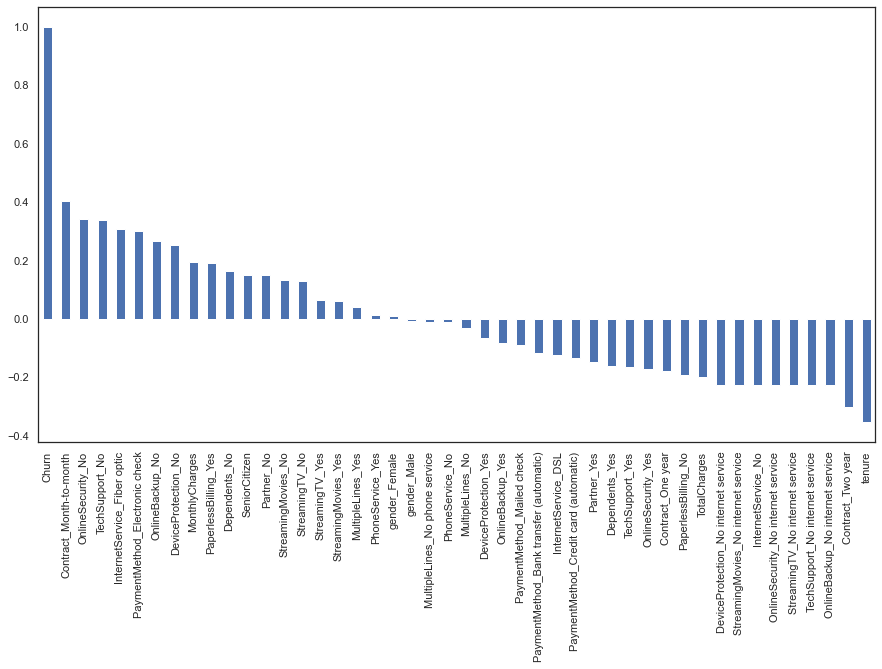

In [10]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<p>The corr() function in Pandas is used to calculate the correlation between two or more variables in a DataFrame. The resulting correlation matrix contains the correlation coefficients for each pair of variables, where each value represents the strength and direction of the linear relationship between the variables.

The correlation coefficient can take on values between -1 and 1, where a value of -1 indicates a perfect negative linear correlation (as one variable increases, the other decreases), a value of 0 indicates no correlation, and a value of 1 indicates a perfect positive linear correlation (as one variable increases, the other also increases).

Therefore, it is entirely possible and expected for the corr() function to return a correlation matrix that contains negative values. A negative correlation coefficient means that the two variables are inversely related, and as one variable increases, the other decreases.

For example, if you have a DataFrame with columns representing the height and weight of individuals, you might expect to see a negative correlation between these variables. This is because as height increases, weight might increase, but not necessarily in a linear manner, so the correlation coefficient would be negative but not necessarily close to -1.

If you have a specific correlation matrix that contains negative values and would like more information on the meaning of these values, please provide additional context or information, and I will do my best to help.</p>

<em>The formula to calculate the correlation coefficient (r) between two variables x and y can be expressed as follows:

r = (nΣxy - ΣxΣy) / sqrt[(nΣx^2 - (Σx)^2) * (nΣy^2 - (Σy)^2)]

where:

n is the number of observations (or data points) for x and y.
Σ represents the sum of all values.
Σxy is the sum of the product of each x and y pair.
Σx and Σy are the sums of all x and y values, respectively.
Σx^2 and Σy^2 are the sums of the squares of all x and y values, respectively.
The correlation coefficient (r) ranges from -1 to 1, where:

r = -1 indicates a perfect negative correlation between x and y (i.e., as x increases, y decreases).
r = 0 indicates no correlation between x and y.
r = 1 indicates a perfect positive correlation between x and y (i.e., as x increases, y also increases).
It is important to note that correlation does not imply causation, and the correlation coefficient only measures the strength and direction of a linear relationship between two variables. Other types of relationships, such as non-linear or causal relationships, may not be captured by the correlation coefficient.</em>

<em>Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.</em>

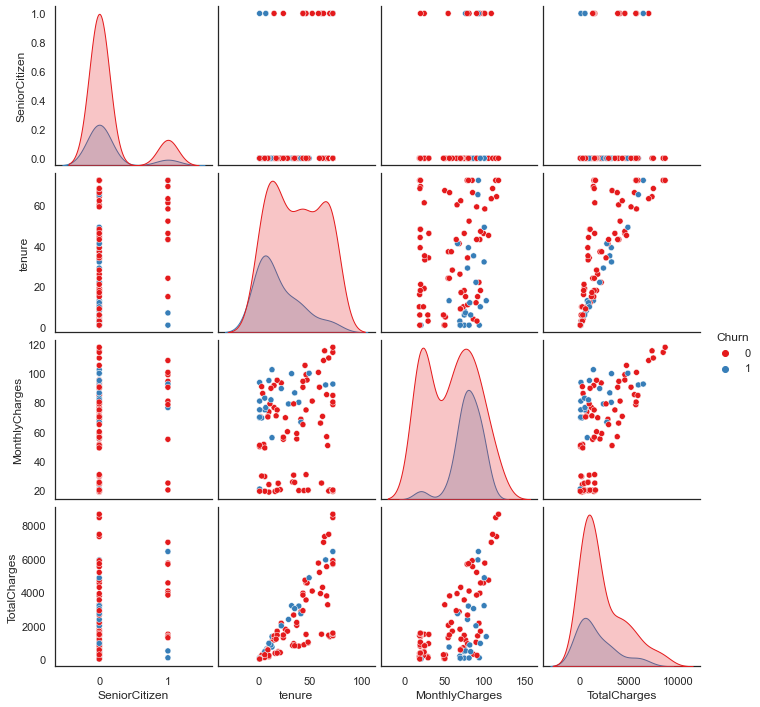

In [26]:
data = df_dummies[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn']].sample(n=100, random_state=42)

g = sns.pairplot(data, hue = 'Churn',palette='Set1', diag_kind='kde')
g.savefig('pairplot.png')

<h3>2.a. Gender</h3>

In [14]:
df2['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

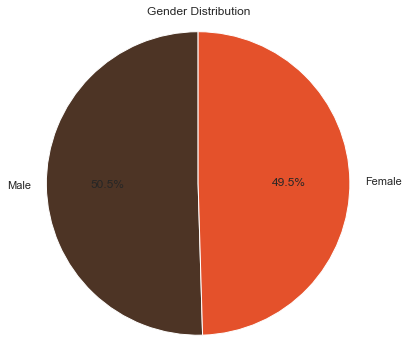

In [38]:
gender_counts = df2['gender'].value_counts()
colors = ['#4D3425','#E4512B']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Our data has equal number for each gender

<h3>2.b. Dependent</h3>

<Figure size 576x432 with 0 Axes>

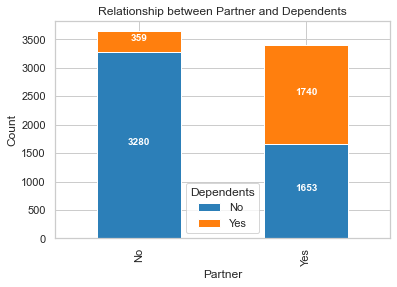

In [34]:
counts = df2.groupby(['Partner', 'Dependents']).size().unstack()
colors = ['#2c7fb8', '#ff7f0e']
plt.figure(figsize=(8, 6))
ax = counts.plot(kind='bar', stacked=True, color=colors)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=10, weight='bold', padding=3)

# Add labels and title
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Relationship between Partner and Dependents')

# Add legend
plt.legend(title='Dependents')

# Show the chart
plt.show()


Around 50% of the customers has partner & dependents. Slightly more customers don't have partners.

<h3>2.c. Churn rate</h3>

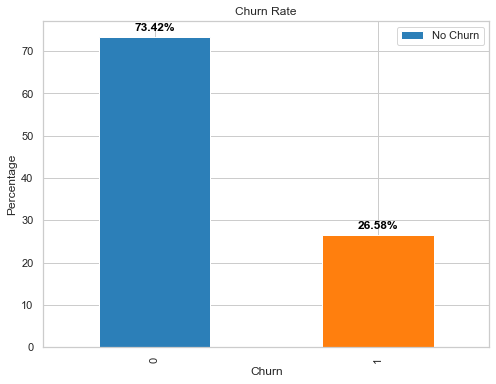

In [40]:
# Calculate the churn rate
churn_rate = df2['Churn'].value_counts() / len(df2['Churn']) * 100

# Create the bar chart
colors = ['#2c7fb8', '#ff7f0e']
plt.figure(figsize=(8, 6))
churn_rate.plot(kind='bar', color=colors)

# Add value labels above each bar
for i, v in enumerate(churn_rate):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Churn Rate')

# Add legend
plt.legend(['No Churn', 'Churn'])

# Show the chart
plt.show()



Apply SMOTE to deal with skewed data, synthetically create sample in the minor area

In [5]:
from imblearn.over_sampling import SMOTE
# Separate the features and the target variable
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# The resampled data now has balanced classes
# X_resampled and y_resampled can be used for model training

# Check the class distribution after applying SMOTE
print(y_resampled.value_counts())
# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)

0    5163
1    5163
Name: Churn, dtype: int64


In [16]:
# Identify and handle outliers
# For example, we can use the Interquartile Range (IQR) method to remove outliers
# Calculate the IQR for each column
Q1 = df_resampled.quantile(0.25)
Q3 = df_resampled.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df_resampled < (Q1 - 1.5 * IQR)) | (df_resampled > (Q3 + 1.5 * IQR))).any(axis=1)

# Handle outliers by removing them from the DataFrame
df_no_outliers = df_resampled[~outliers]
df_no_outliers.describe(include='all')



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
count,2662.0,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.0,...,2662.000000,2662.0,2662.0,2662.000000,2662.000000,2662.0,2662.0,2662.000000,2662.0,2662.000000
mean,0.0,15.030053,81.538006,1355.908668,0.323817,0.318182,0.575131,0.143501,0.797896,0.0,...,0.910594,0.0,0.0,0.095417,0.691961,0.0,0.0,0.582269,0.0,0.909467
std,0.0,16.655354,15.445537,1637.623813,0.468019,0.465858,0.494416,0.350649,0.401645,0.0,...,0.285383,0.0,0.0,0.293845,0.461770,0.0,0.0,0.493278,0.0,0.286998
min,0.0,1.000000,23.710589,42.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
25%,0.0,2.000000,74.066805,170.580174,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000
50%,0.0,9.000000,83.084935,701.546494,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000
75%,0.0,22.000000,93.497858,1890.272185,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000
max,0.0,72.000000,112.866416,7683.791659,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000


<h2>3. FITTING THE DATA TO MODEL</h2>

<h3>3.a. Random Forest</h3>

In [12]:

X_resampled = df_no_outliers.drop('Churn',axis=1)
y_resampled = df_no_outliers['Churn']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train and evaluate multiple classification algorithms

print("---------------------------------------")
print("-------- LogisticRegression ----------")
print("---------------------------------------")

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Precision:", precision_score(y_test, lr_y_pred))
print("Recall:", recall_score(y_test, lr_y_pred))
print("F1 score:", f1_score(y_test, lr_y_pred))

print("---------------------------------------")
print("-------- DecisionTreeClassifier ----------")
print("---------------------------------------")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1 score:", f1_score(y_test, dt_y_pred))

print("---------------------------------------")
print("-------- RandomForestClassifier ----------")
print("---------------------------------------")

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1 score:", f1_score(y_test, rf_y_pred))

---------------------------------------
-------- LogisticRegression ----------
---------------------------------------
Logistic Regression
Accuracy: 0.900562851782364
Precision: 0.9142300194931774
Recall: 0.9811715481171548
F1 score: 0.946518668012109
---------------------------------------
-------- DecisionTreeClassifier ----------
---------------------------------------
Decision Tree
Accuracy: 0.900562851782364
Precision: 0.9292929292929293
Recall: 0.9623430962343096
F1 score: 0.9455292908530318
---------------------------------------
-------- RandomForestClassifier ----------
---------------------------------------


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest
Accuracy: 0.9099437148217636
Precision: 0.9232283464566929
Recall: 0.9811715481171548
F1 score: 0.95131845841785


<h1>END</h1>